In [48]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("EXT_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))

ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))


### CONSTANTS ###
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
HASH = "email_hash"
INSTALL = "install_id"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
FREQ_TIME ="freq_time"
GOAL_TIME = "goal_time"
TARGET_TIME = "target_time"
BROWSER = "browser"
BROWSER_DOMAIN = "browser_domain"
GOAL_TIMES = "goal_frequency_days"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
BROWSER = "browser"
FREQUENCY = "frequency"
TIME = "time"
GOAL = "goal"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
AVG_GOAL_TIME = "avg_goal_time"
UNPRODUCTIVE_TIME = "unproductive_time"
PRODUCTIVE_TIME = "productive_time"
INFREQ_TIME = "infreq_time"
NUM_FREQ_GOALS = "num_freq_goals"
NUM_INFREQ_GOALS = "num_infreq_goals"
import time


### FUNCTIONS ###
# Get freq stats
# week -> goal -> freq
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def get_freq_stats(user):
    """
    Gets the frequency stats for browser.
    :param user user id 
    :return {week: {FREQ_GOALS: set(), INFREQ_GOALS: set()}}
    """
    stat = {}
    for setting in ext_db[user + "_synced:goal_frequencies"].find():
        val = json.loads(setting["val"])
        if val["algorithm"] == "isoweek_random":
            isoWeek = int(datetime.fromtimestamp(setting["timestamp_local"]/1000 + 8 * (60 ** 2)).isocalendar()[1])
            currentIsoWeek = int(datetime.fromtimestamp(time.time()).isocalendar()[1])
            for week in range(isoWeek, currentIsoWeek + 1):
                if str(week) not in stat:
                    stat[str(week)] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
                if val["onweeks"][week] == 1:
                    stat[str(week)][FREQ_GOALS].add(get_name(setting["key"], BROWSER))
                else:
                    stat[str(week)][INFREQ_GOALS].add(get_name(setting["key"], BROWSER))
    return stat


/home/drew/habitlab-data-analysis


In [172]:
def det_quart_index(duration):
    if duration < 16.0:
        return 0
    if duration < 40.0:
        return 1
    if duration < 108.0:
        return 2
    return 3

def get_obj(stats, nudged, duration):
    return stats[nudged][det_quart_index(duration)]

# Now, for each day, get frequency intensity
types = ["nudged", "not"]
sankey_stats = {}
quarts = ["25", "50", "75", "100"]
for t in types:
    sankey_stats[t] = []
    for q in quarts:
        sankey_stats[t].append({"goal app": 0, "non-goal app": 0, "leave phone": 0, "target app": 0})
durations = []
import math
import moment
for account in accounts:
    for user in account[ANDROID]:
        prev_timestamp = 0
        received_intervention = False
        first = True
        for s in db[user+ "_sessions"].find({"target": {"$exists": True}, "interventions": {"$exists": True}, "enabled": {"$exists": True},  }):
            if s["enabled"] and len(s["interventions"]) > 0:
                durations.append(s["duration"])
            nudged = "nudged" if received_intervention else "not"
            received_intervention = s["enabled"] and len(s["interventions"]) > 0
            stats_obj = get_obj(sankey_stats, nudged, s["duration"])
            if first:
                first = False
                prev_timestamp = s["timestamp"]
                continue
            if s["timestamp"] - s["duration"] * 1000 - prev_timestamp> 20 * 1000:
                prev_timestamp = s["timestamp"]
                stats_obj["leave phone"] += 1
                continue
            prev_timestamp = s["timestamp"]
            if s["enabled"]:
                stats_obj["goal app"] += 1
                continue
            if s["target"]:
                stats_obj["target app"] += 1
                continue
            else:
                stats_obj["non-goal app"] += 1

In [173]:
import numpy as np
print(np.percentile(durations, 25))
print(np.percentile(durations, 50))
print(np.percentile(durations, 75))
print(np.percentile(durations, 100))
print(sankey_stats)


16.0
39.0
108.0
38737.0
{'nudged': [{'goal app': 15041, 'non-goal app': 27263, 'leave phone': 14650, 'target app': 344}, {'goal app': 16149, 'non-goal app': 17546, 'leave phone': 11287, 'target app': 283}, {'goal app': 15958, 'non-goal app': 11271, 'leave phone': 9335, 'target app': 260}, {'goal app': 15358, 'non-goal app': 9282, 'leave phone': 11570, 'target app': 248}], 'not': [{'goal app': 35740, 'non-goal app': 159671, 'leave phone': 64577, 'target app': 1361}, {'goal app': 38993, 'non-goal app': 113139, 'leave phone': 47179, 'target app': 1370}, {'goal app': 38322, 'non-goal app': 82679, 'leave phone': 37246, 'target app': 1388}, {'goal app': 38205, 'non-goal app': 77393, 'leave phone': 48519, 'target app': 1621}]}


Previous flow: 1.0
Remaining flow:0.6680873707618589
1.1102230246251565e-16
Previous flow: 0.6680873707618589
Remaining flow:0.41322296206643866
-5.551115123125783e-17
Previous flow: 0.41322296206643866
Remaining flow:0.21048687901874896
0.0
Previous flow: 0.21048687901874896
-3.0357660829594124e-18


'\ntot2 = sum([sankey_stats["not"][t] for t in sankey_stats["not"]])\nflow = [1]\nlabels = ["not"]\n\nfor t in sankey_stats["not"]:\n    flow.append(-1 * sankey_stats["not"][t]/tot2)\n    labels.append(t)\nSankey(format="%.2f",scale=1.4, flows=flow,\n       labels=labels,\n       orientations=[0, 1, -1, 0, 1]).finish()\n\nprint(tot1)\nprint(tot2)\n\n'

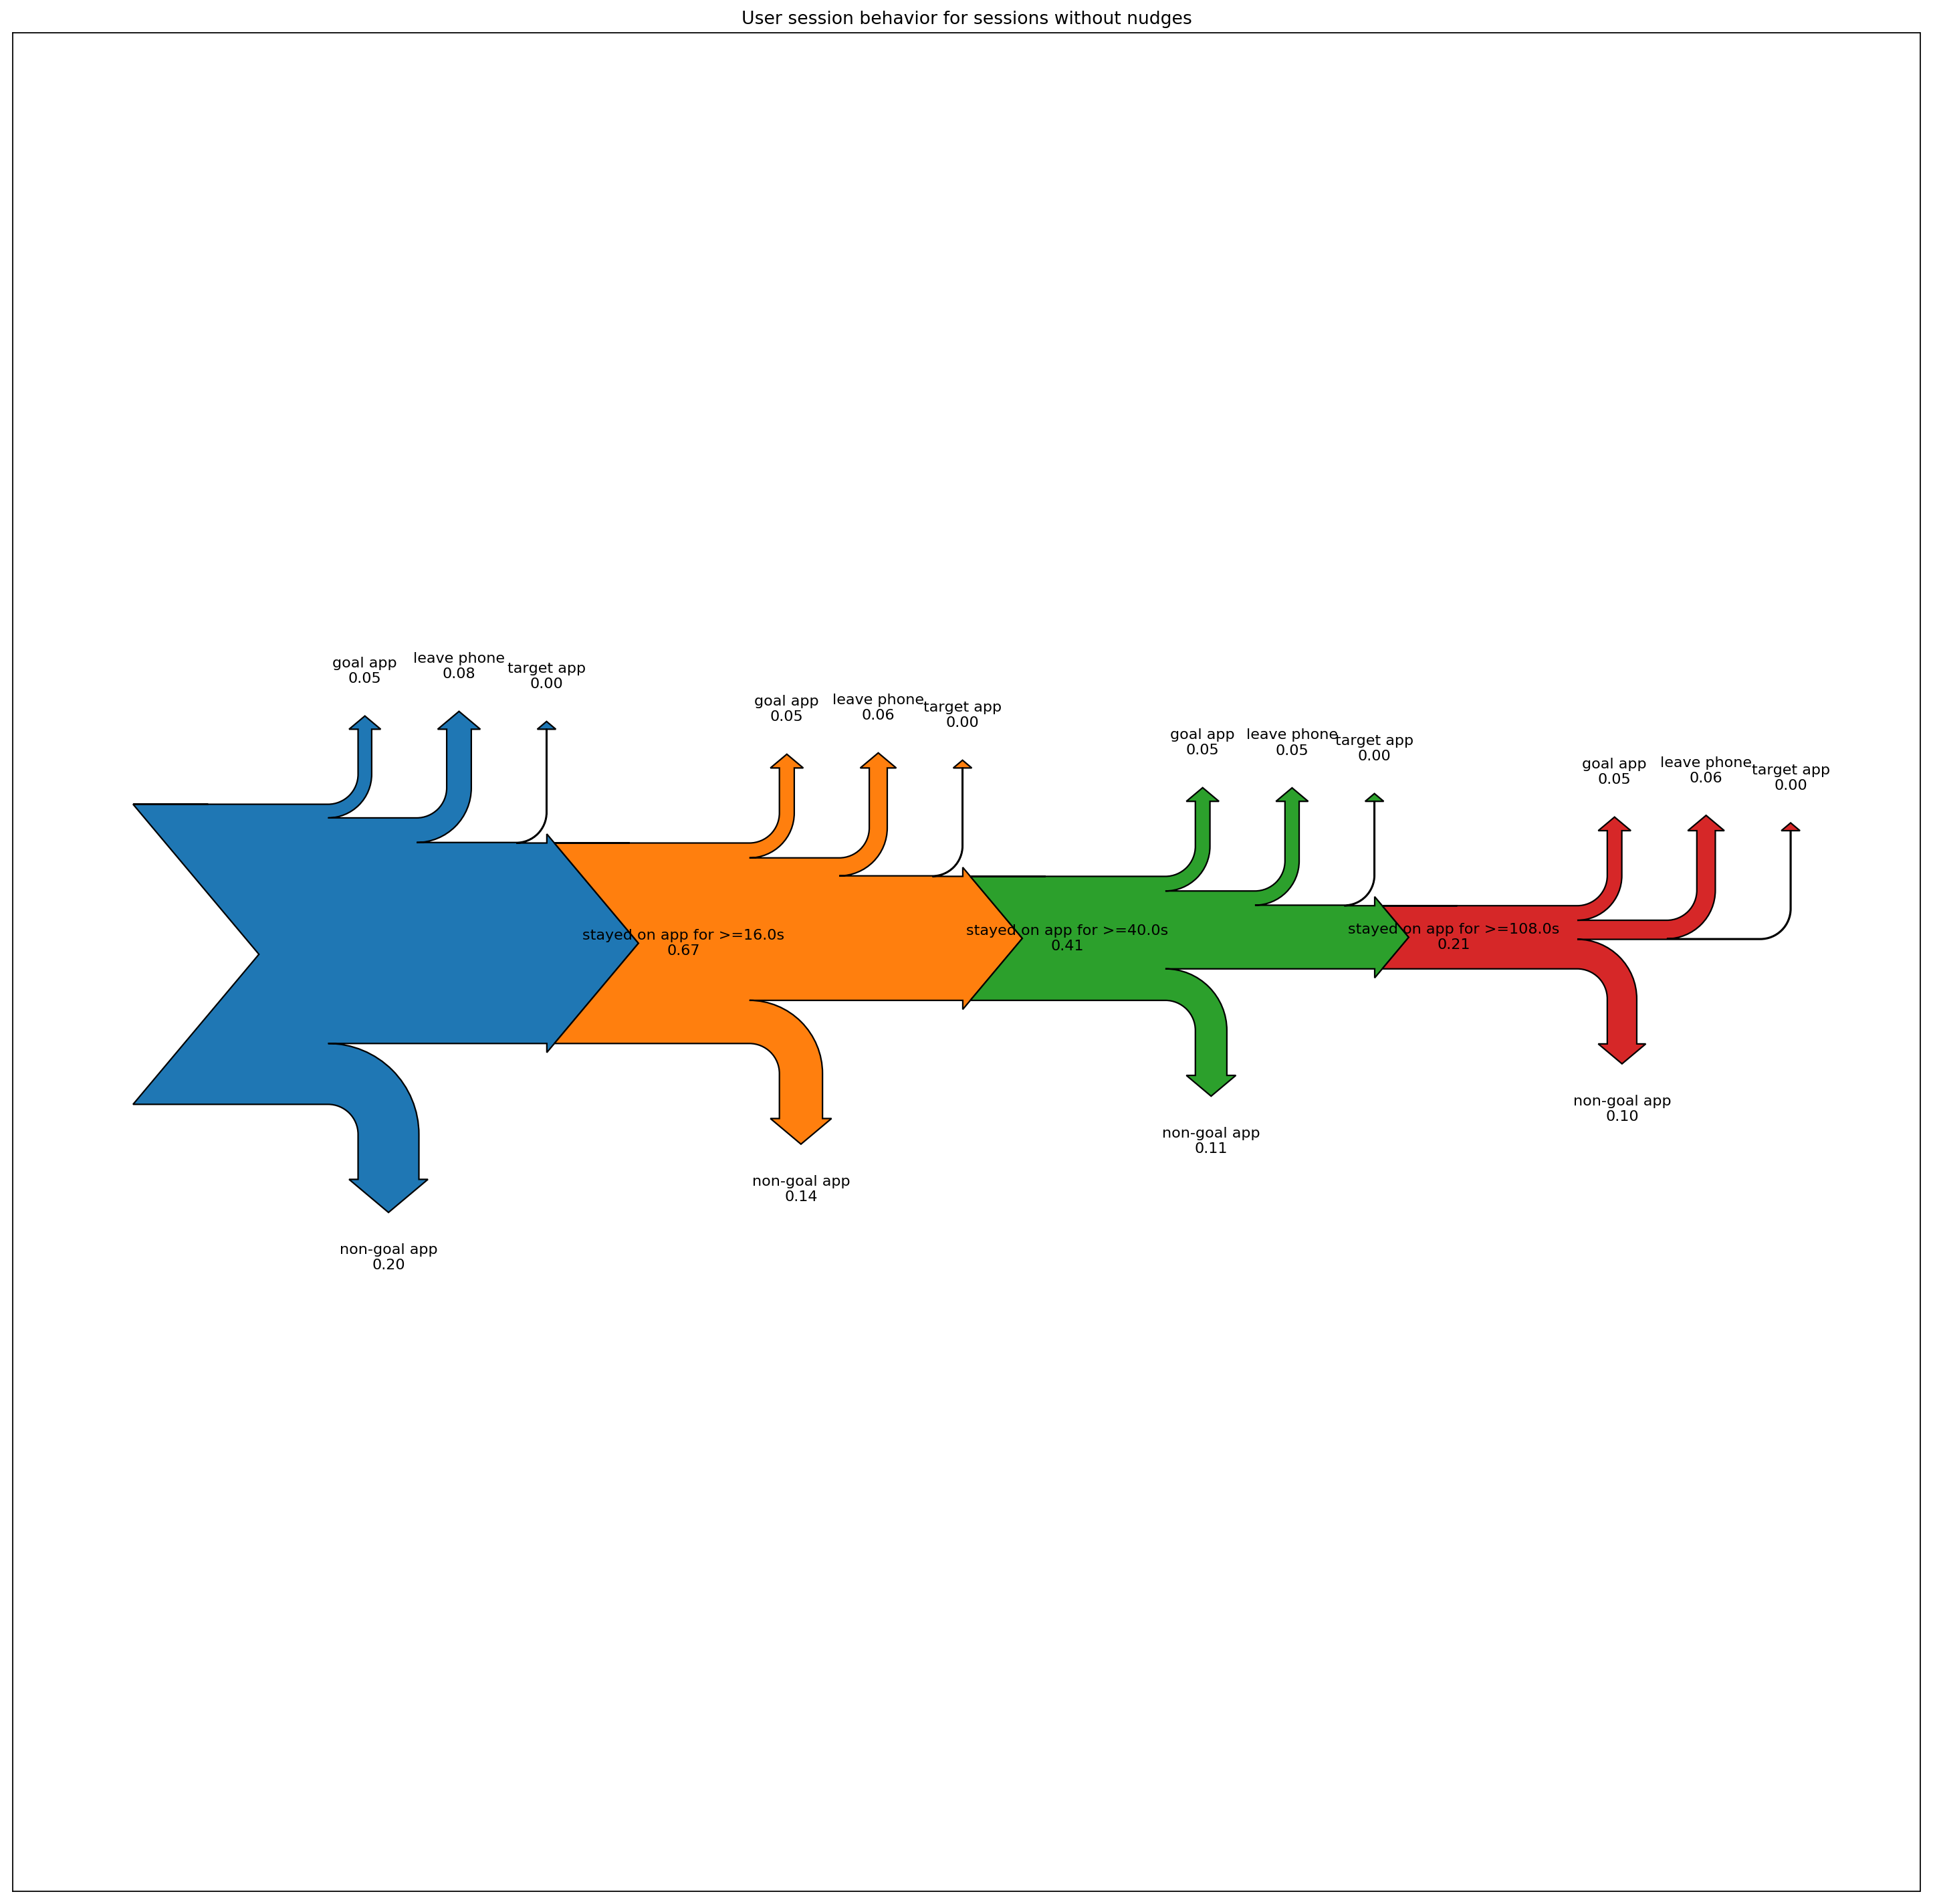

In [174]:
from matplotlib.sankey import Sankey
import matplotlib.pyplot as pyplot
quartiles = [16.0, 40.0, 108.0, 46912.0]
fig = pyplot.figure(23, figsize=(23, 23), dpi=160)
ax = fig.add_subplot(1, 1, 1, xticks = [], yticks = [], title='User session behavior for sessions without nudges' )             
sank = Sankey(format="%.2f", ax=ax)
counter = 0
gran_tot = sum([sum([stats[t] for t in stats]) for stats in sankey_stats['not']])
prev_tot = 0
for stats in sankey_stats["not"]:    
    tot1 = sum([stats[t] for t in stats])
    print("Previous flow: "+ str((gran_tot-prev_tot)/gran_tot))
    flow = [(gran_tot-prev_tot)/gran_tot]
    prev_tot += tot1
    labels = [None]
    for t in stats:
        flow.append(-1 * stats[t]/gran_tot)
        labels.append(t.replace("go to ", ''))
    if counter < 3:
        print("Remaining flow:" + str((gran_tot-prev_tot)/gran_tot))
        flow.append(-(gran_tot-prev_tot)/gran_tot)
        labels.append("stayed on app for >=" + str(quartiles[counter]) + "s")
    orientations = [0, 1, -1, 1, 1]
    if counter < 3:
        orientations.append(0)
    print(sum(flow))
    if counter == 0:
        sank.add(flows=flow,
               labels=labels,
                orientations=orientations)
    else:
        sank.add(flows=flow,
               labels=labels,
               orientations=orientations, prior = counter - 1, connect=(5, 0))
    counter += 1
sank.finish()
pyplot.savefig('./flow_of_time_not_nudged.png', 
                dpi = 300, 
                frameon = None,
                transparent = True,
                scale = 0.01)
"""
tot2 = sum([sankey_stats["not"][t] for t in sankey_stats["not"]])
flow = [1]
labels = ["not"]

for t in sankey_stats["not"]:
    flow.append(-1 * sankey_stats["not"][t]/tot2)
    labels.append(t)
Sankey(format="%.2f",scale=1.4, flows=flow,
       labels=labels,
       orientations=[0, 1, -1, 0, 1]).finish()

print(tot1)
print(tot2)

"""

